### 필수과제3
- 레이블에 따른 리뷰의 분포
* 워드클라우드를 통해 긍정과 부정에 어떤 식의 키워드들이 있는지 시각화로 간단하게 정리하기 !

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
! pip install konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# 데이터 불러오기
df = pd.read_csv('movie_rv.csv')

# 결측치 제거 및 데이터 부분 추출
df_sp = df.dropna()[:50000]

# 전처리 함수 생성
def pre(review, sw) :
  tw_tag = Okt()
  pre_review = re.sub('[^가-힣\\s]', " ", review) # 정규표현식
  tokens = tw_tag.pos(pre_review) # 형태소 분리
  pre_sw = [i[0] for i in tokens if i[0] not in sw] # 불용어 제거
  pre = ' '.join(pre_sw)
  return pre

# 불용어 정의
stop_words = ['이', '점', '것', '다', '하는', '때', '내', '거', '뭐', '그', '좀', '이런', '할', '이건' ]

# 함수를 데이터프레임에 적용
df_sp['document'] = df_sp['document'].apply(lambda x : pre(x, stop_words))
df_sp

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,1,3819312,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍지 않구나,1
2,2,10265843,너 무재 밓었 다그 래서 보는것을 추천 한,0
3,3,9045019,교도소 이야기 구먼 솔직히 재미 는 없다 평점 조정,0
4,4,6483659,사이 몬페 의 익살스런 연기 가 돋보였던 영화 스파이더맨 에서 늙어 보이기만 했던 ...,1
...,...,...,...,...
49996,49996,4489208,보지마 셈 저 믿으세요 보지마 셈,0
49997,49997,1606591,최고 졸작,0
49998,49998,8506407,재밌고 좋았음 자 쓰라고,1
49999,49999,3564795,소박하지만 잔잔한 감동 을 주는 영화,1


([<matplotlib.axis.XTick at 0x7f8ea374e170>,
 [Text(0, 0, '부정'), Text(1, 0, '긍정')])

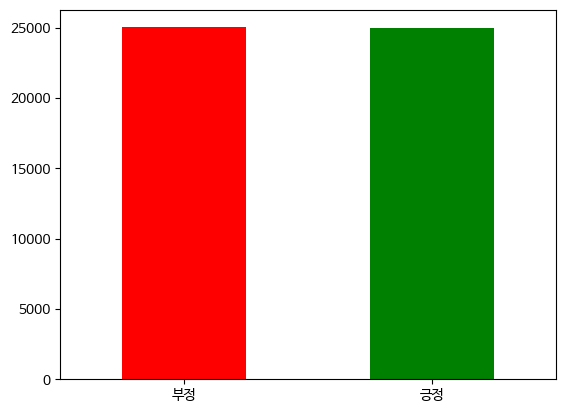

In [2]:
# 긍/부정 분포
plt.rc('font', family='NanumBarunGothic')
df_sp['label'].value_counts().plot(kind = 'bar', color=['red', 'green'])
plt.xticks([0, 1], ['부정', '긍정'], rotation=0)

In [3]:
# 긍/부정 변수 생성
pos = df_sp[df_sp['label'] == 1]['document']
neg = df_sp[df_sp['label'] == 0]['document']

In [4]:
# 토크나이저 명사 함수 생성
def my_token(doc):
  tw_tag = Okt()
  return [token for token, pos in tw_tag.pos(doc) if pos in ['Noun']]

In [5]:
# 한글 폰트 경로 찾기 (나눔)
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for font in font_list :
  if 'Nanum' in font :
    print(font)

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf


In [6]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf'

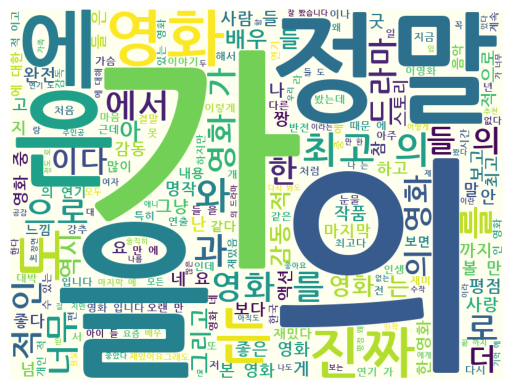

In [7]:
# 긍정적인 리뷰에 대한 워드 클라우드 생성
pos_text = ' '.join(pos)
wc_pos = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud_pos = wc_pos.generate(pos_text)
plt.imshow(cloud_pos)
plt.axis('off')
plt.show()

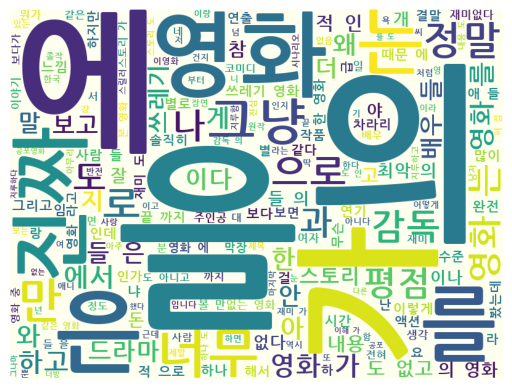

In [8]:
# 부정적인 리뷰에 대한 워드 클라우드 생성
neg_text = ' '.join(neg)
wc_neg = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud_neg = wc_neg.generate(neg_text)
plt.imshow(cloud_neg)
plt.axis('off')
plt.show()

-> 생성된 워드클라우드에 조사가 너무 많이 포함되어 있어서 긍정과 부정의 차이를 알기 어려워 보인다. 나중에는 전처리를 통해 조사를 제거해 긍, 부정의 차이를 알아보기 쉽게 전처리 해보자 !